In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from scipy.ndimage.measurements import label
import glob
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from util_functions import *
import time
from sklearn.svm import LinearSVC
from sklearn.externals import joblib

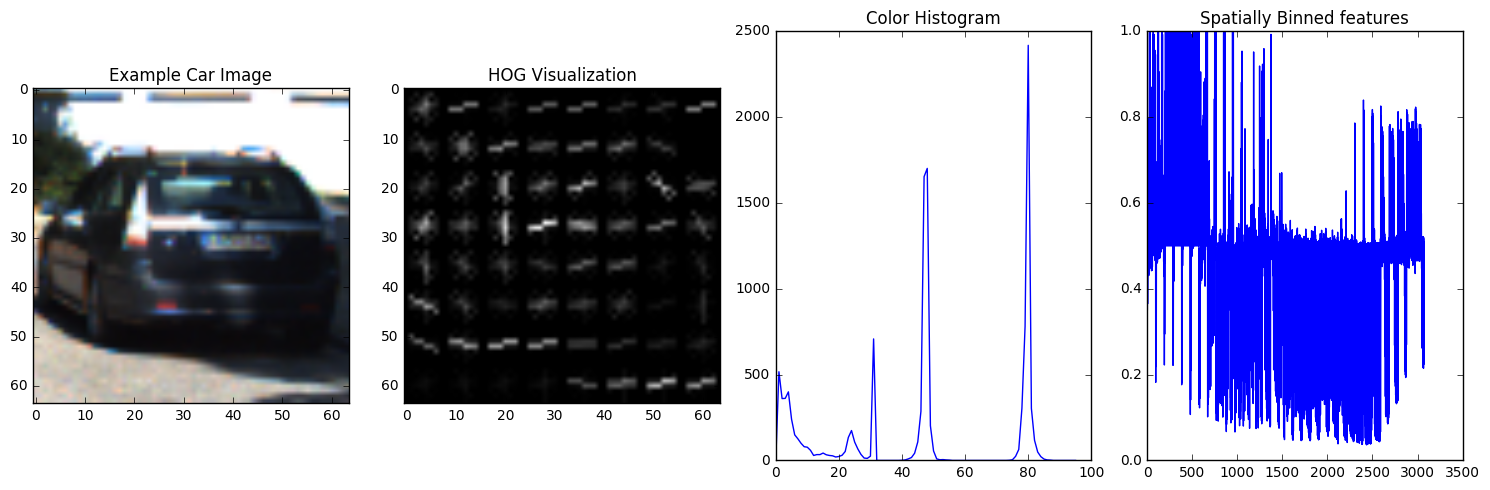

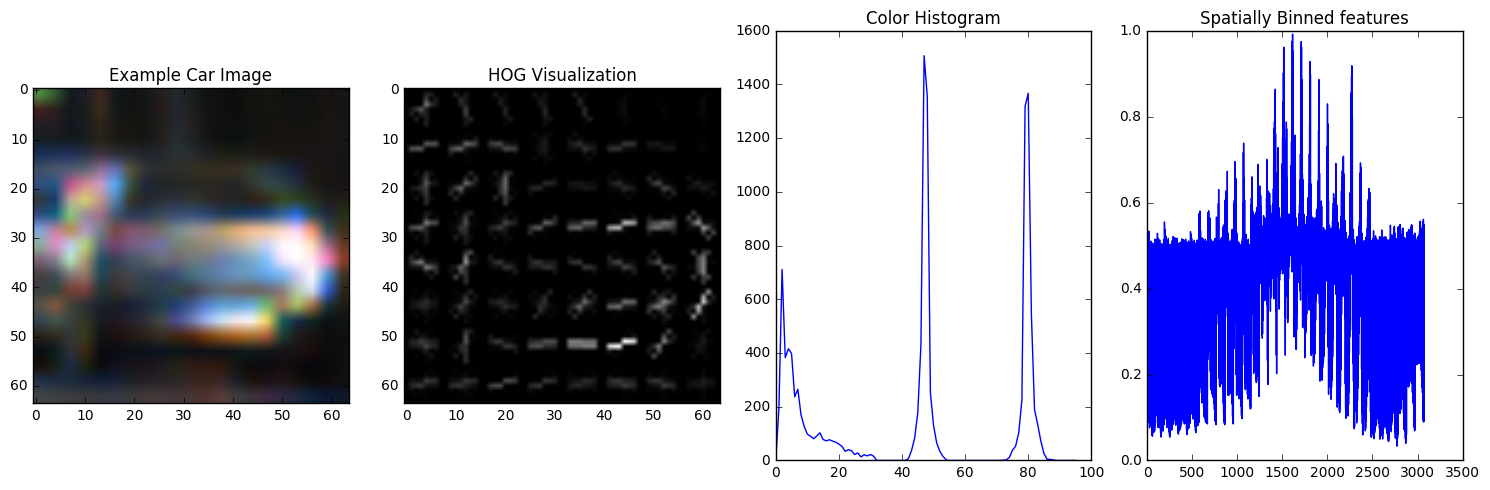

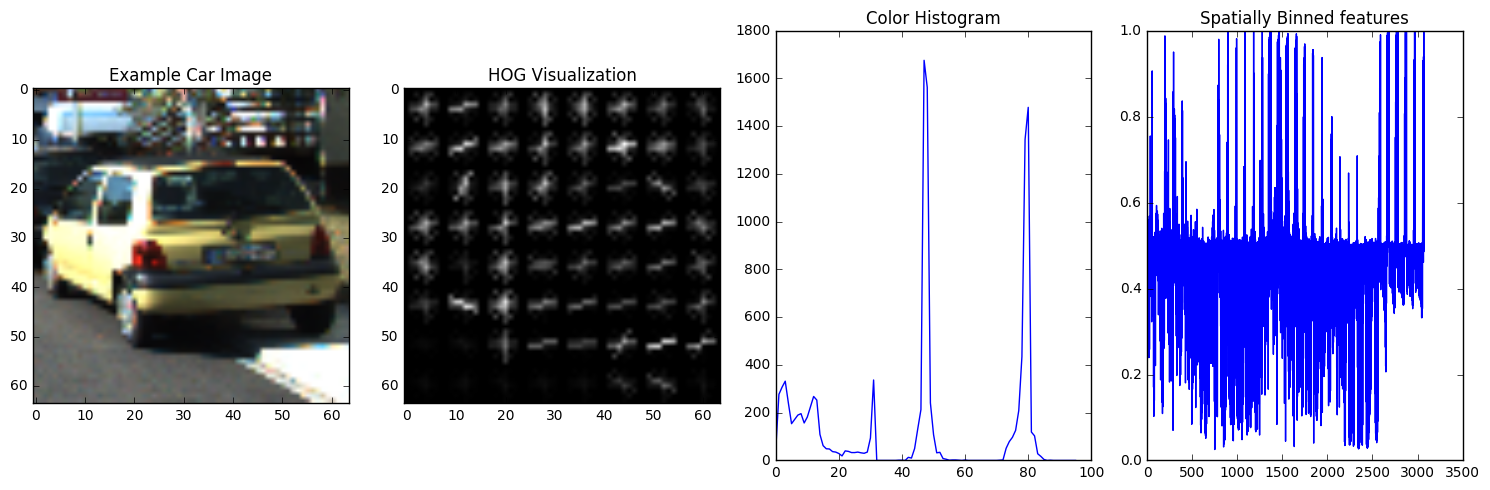

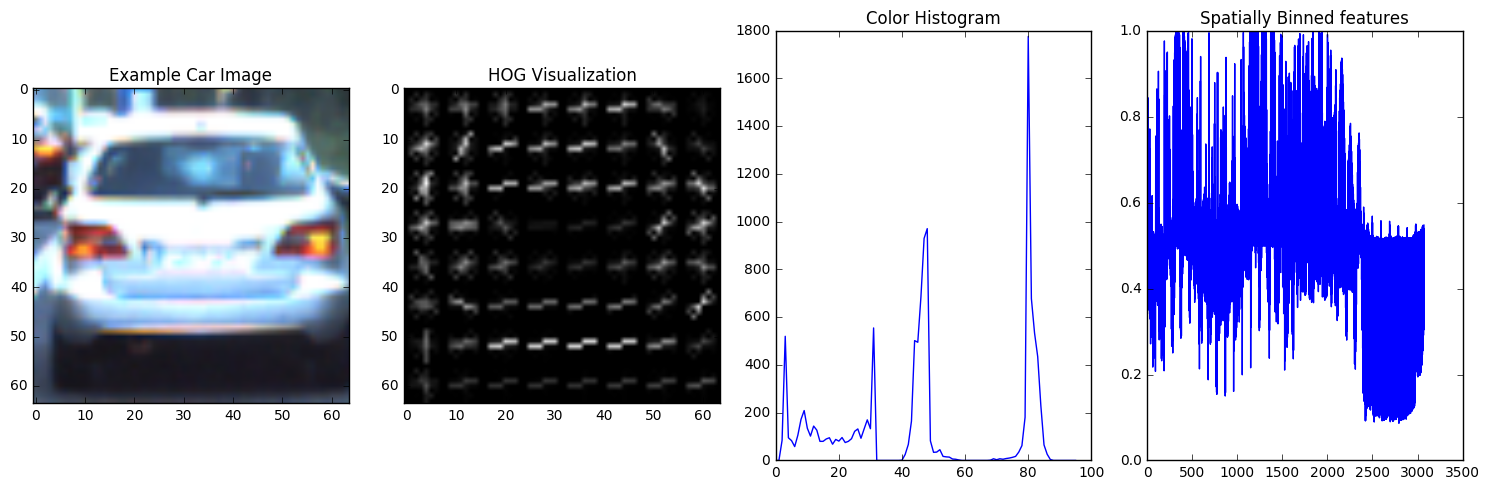

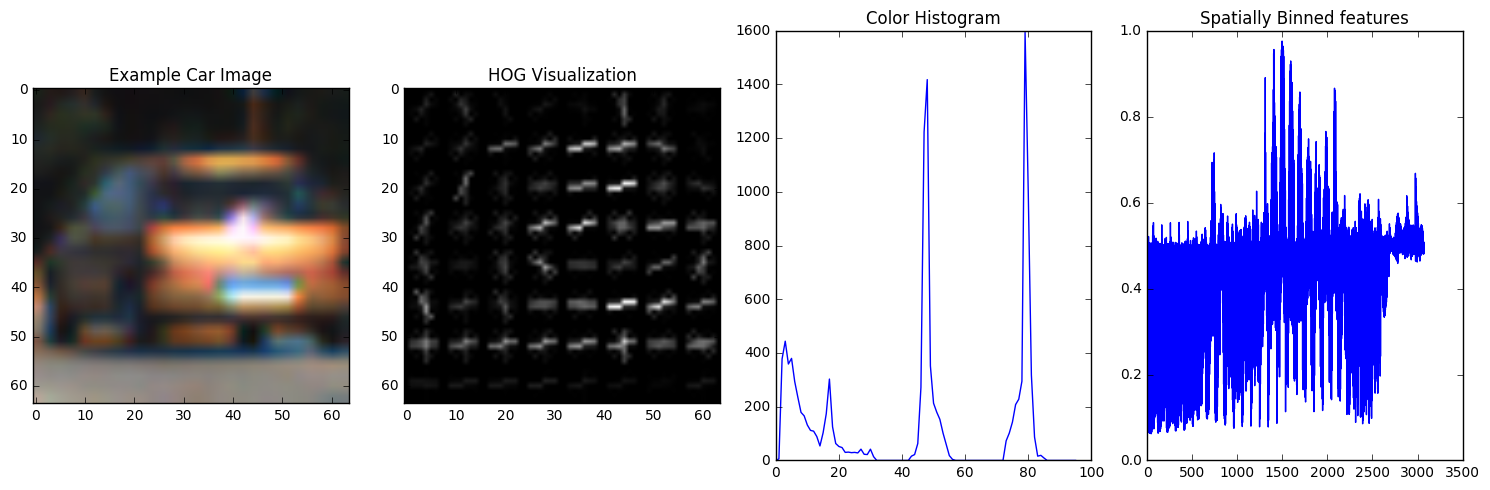

In [32]:
# Read in our vehicles
images = glob.glob('./vehicle_test/*.png')
cars = []

# for image in images:
#     cars.append(image)

    
for img_file in images:

    # Read in the image
    image = mpimg.imread(img_file)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    bin_spat = bin_spatial(convert_color(image), size=(32, 32))
    chist = color_hist(convert_color(image), nbins=32, bins_range=(0.0, 1.0))

    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    _, hog_image = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)


    # Plot the examples
    fig = plt.figure(figsize=(15,5))
    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Example Car Image')
    plt.subplot(142)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.subplot(143)
    plt.plot(chist)
    plt.title('Color Histogram')
    plt.subplot(144)
    plt.plot(bin_spat)
    plt.title('Spatially Binned features')
    fig.tight_layout()


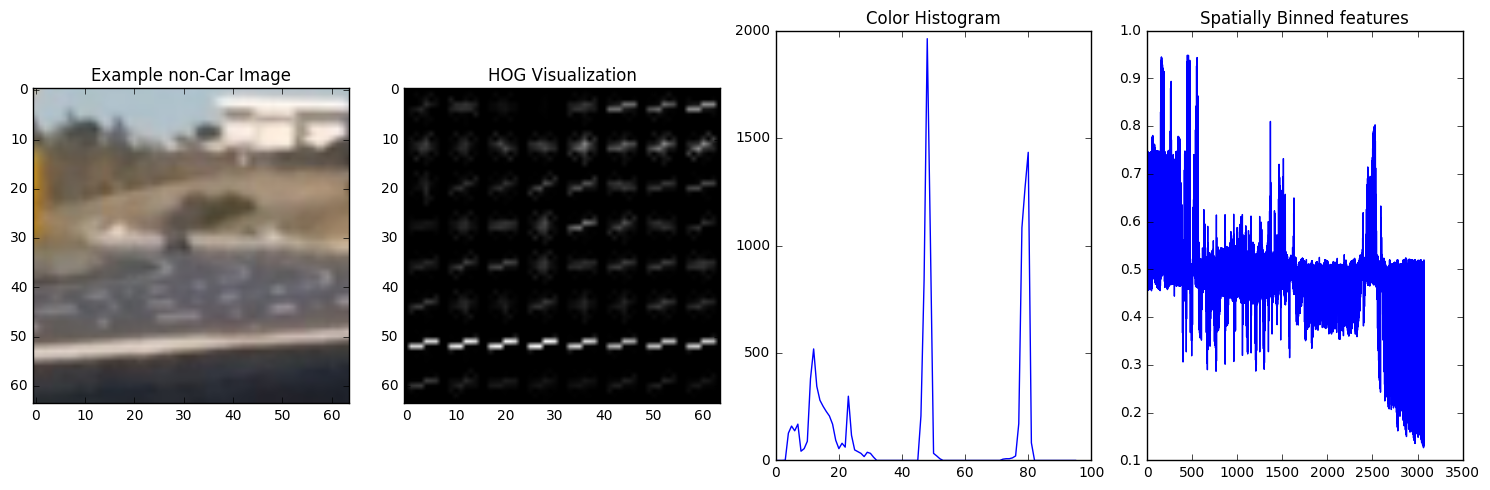

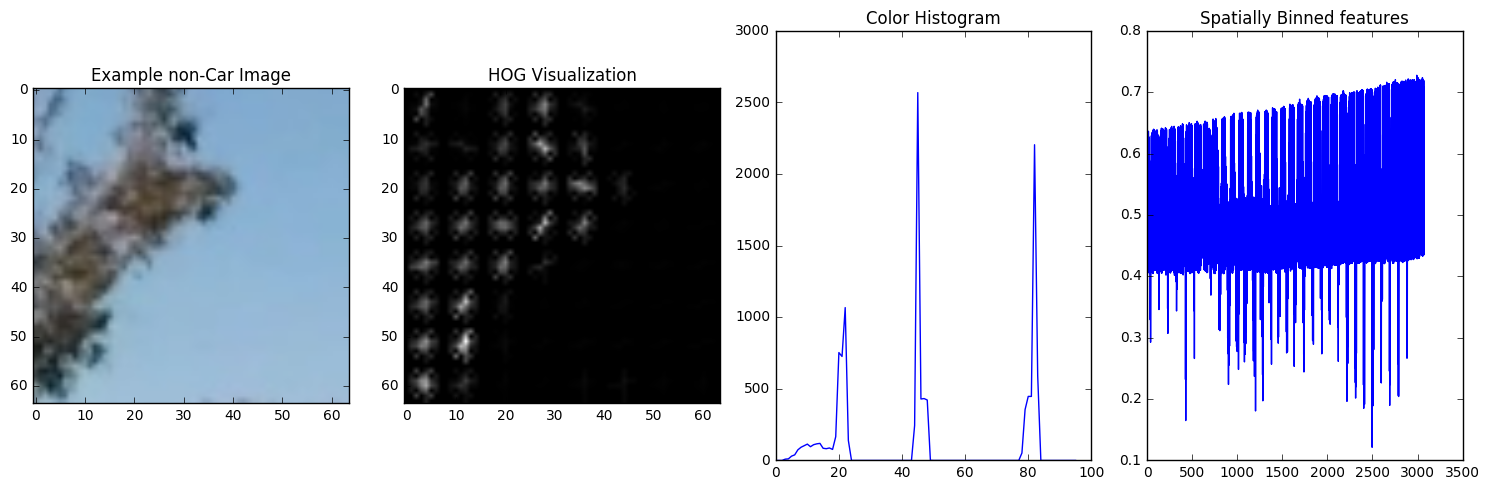

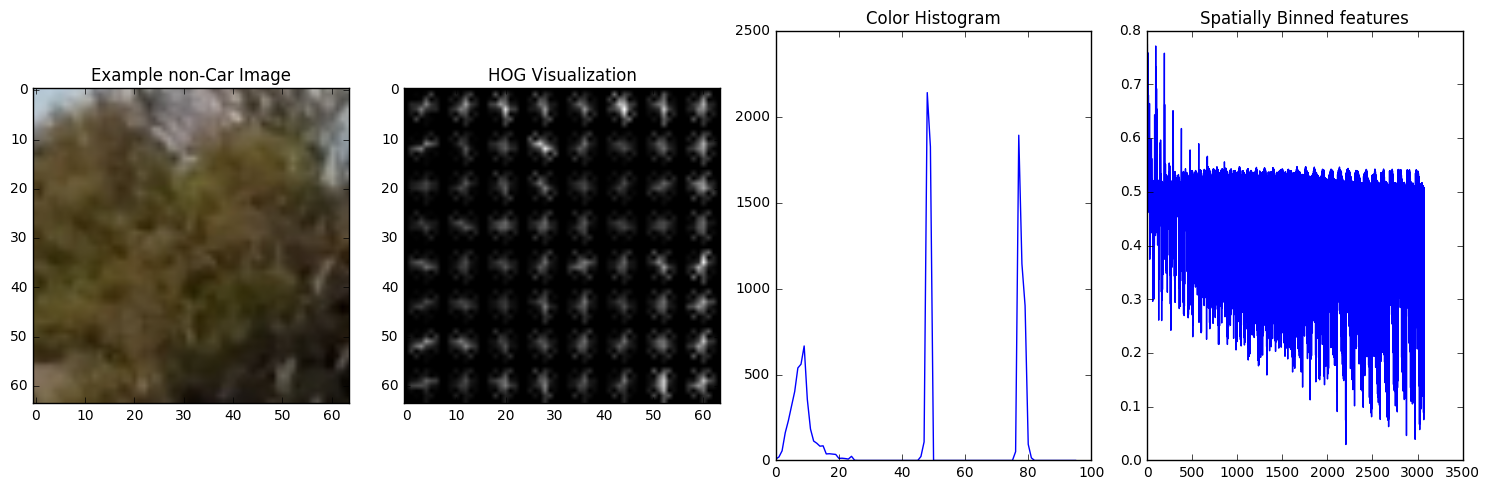

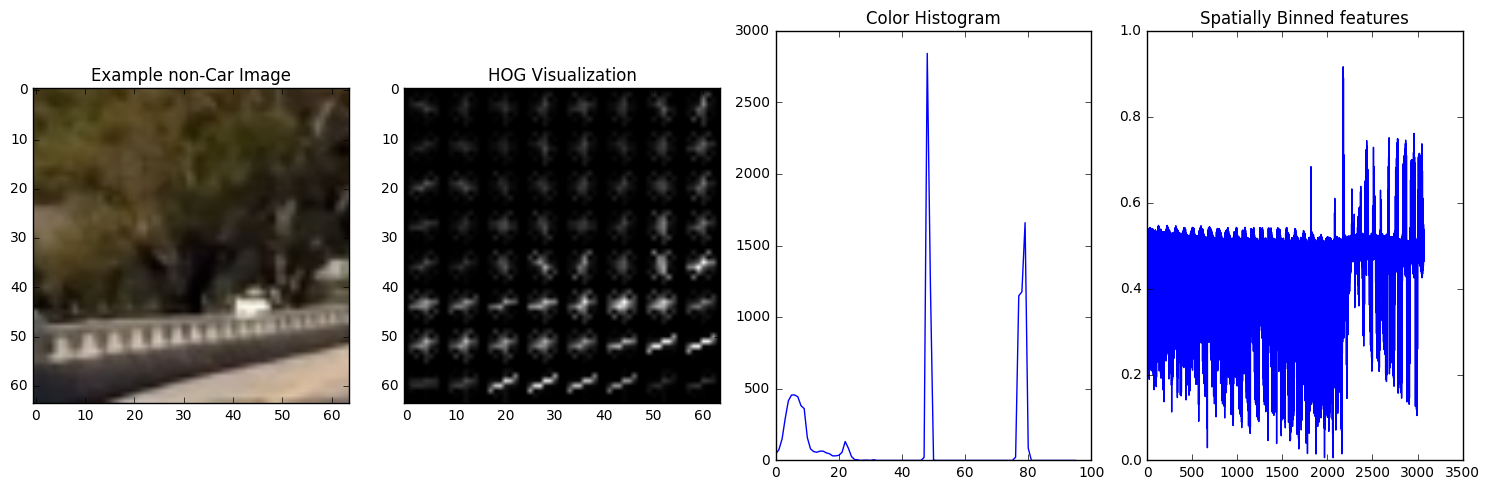

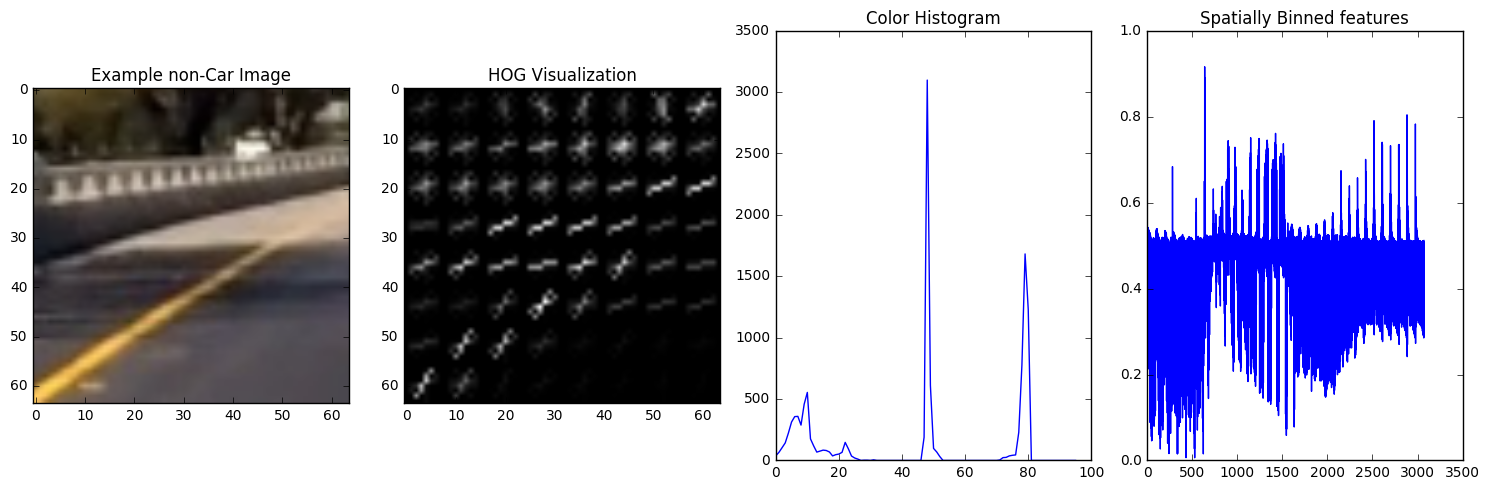

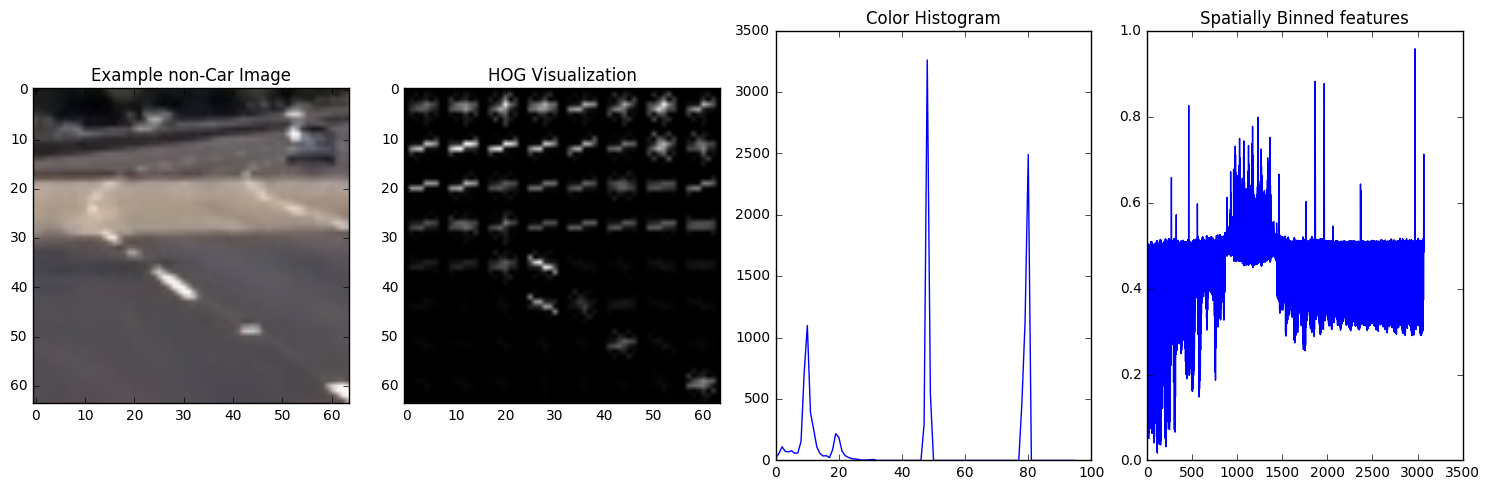

In [33]:
images = glob.glob('./non_vehicle_test/*.png')
    
for img_file in images:

    # Read in the image
    image = mpimg.imread(img_file)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    bin_spat = bin_spatial(convert_color(image), size=(32, 32))
    chist = color_hist(convert_color(image), nbins=32, bins_range=(0.0, 1.0))

    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    _, hog_image = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)


    # Plot the examples
    fig = plt.figure(figsize=(15,5))
    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Example non-Car Image')
    plt.subplot(142)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.subplot(143)
    plt.plot(chist)
    plt.title('Color Histogram')
    plt.subplot(144)
    plt.plot(bin_spat)
    plt.title('Spatially Binned features')
    fig.tight_layout()


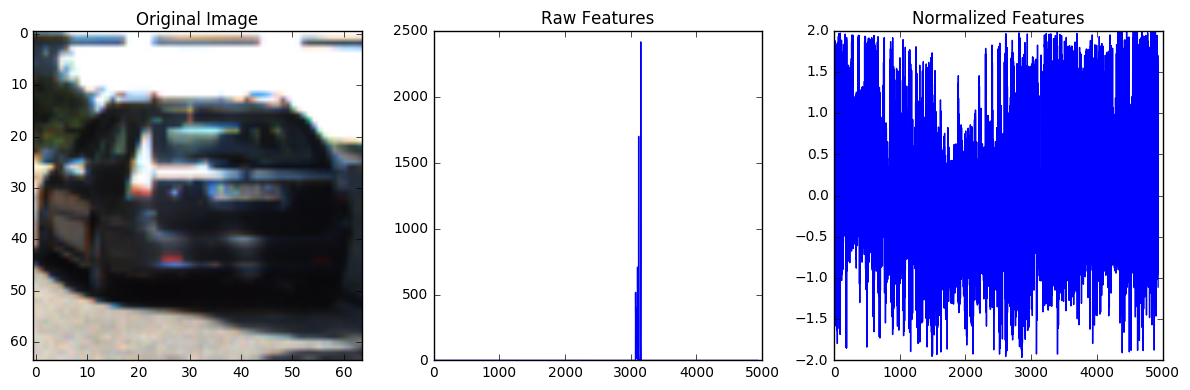

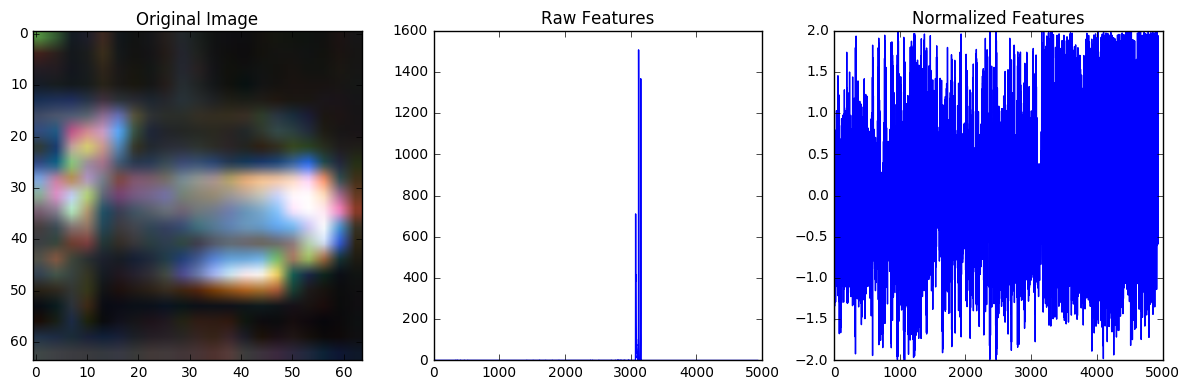

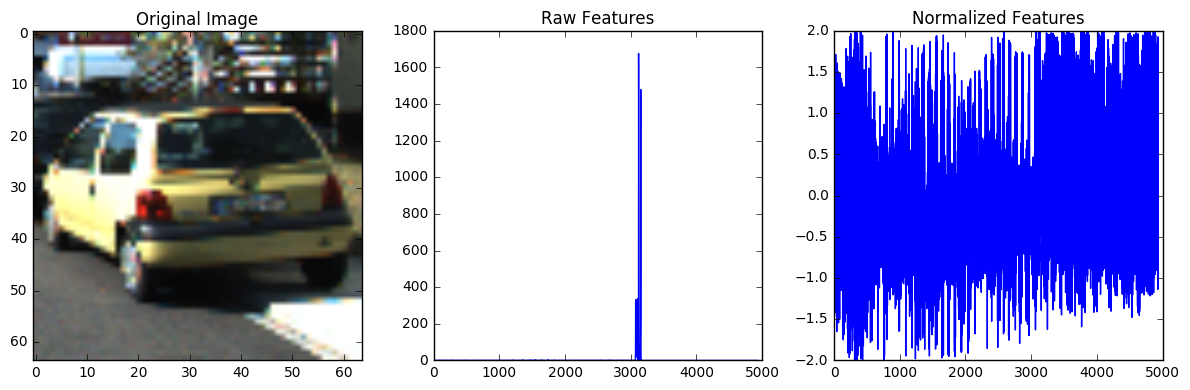

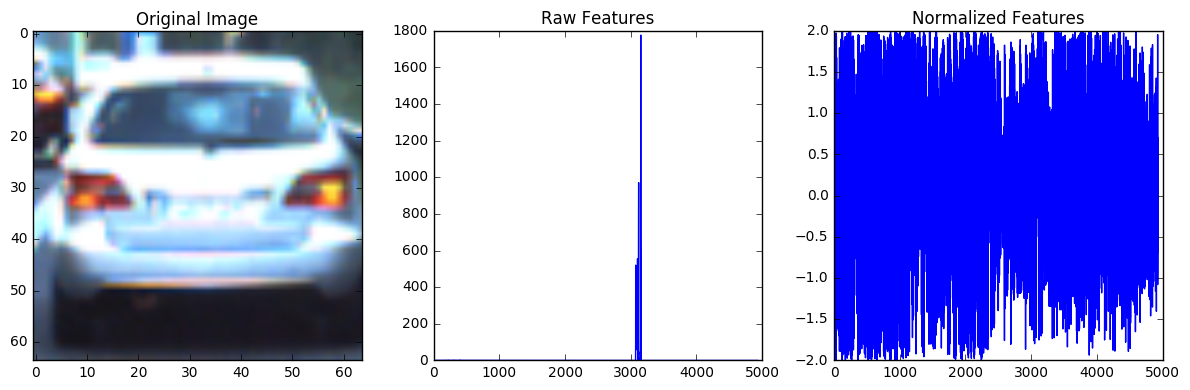

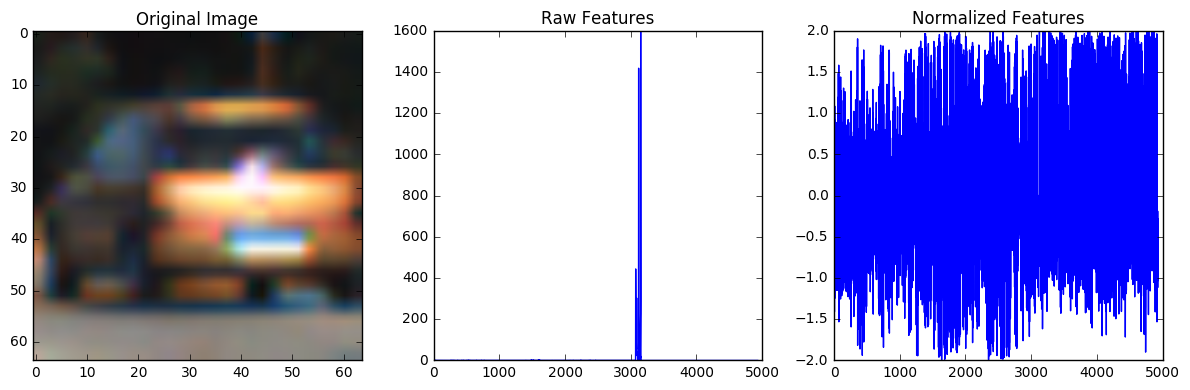

In [18]:
from util_functions import *

# Read in our vehicles and non-vehicles
images = glob.glob('./vehicle_test/*.png')
cars = []

for image in images:
    cars.append(image)
        
car_features = extract_features(cars, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32,
                        spatial_feat=True, hist_feat=True, hog_feat=True)


for car_ind in range(len(car_features)):
    X = car_features                       

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)

    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()


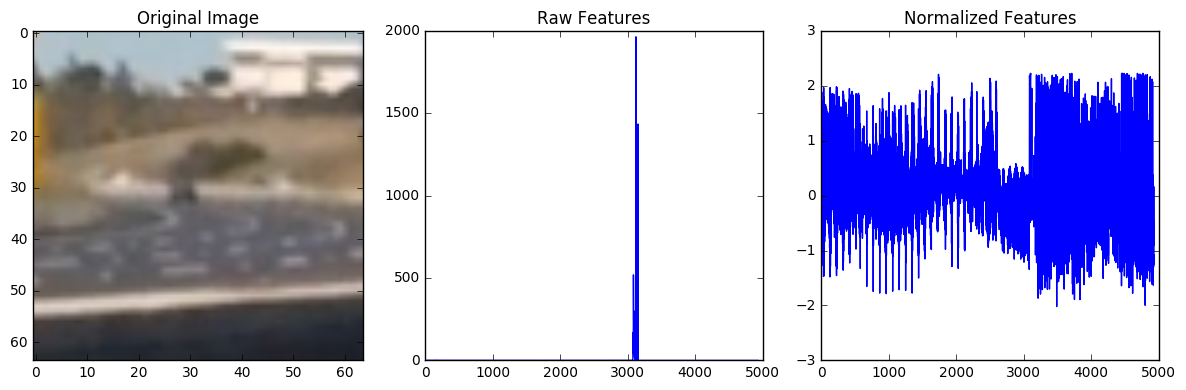

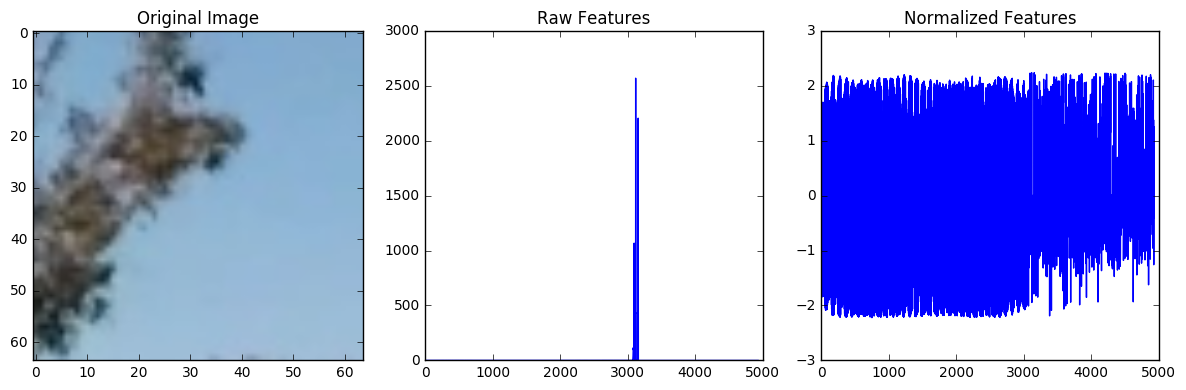

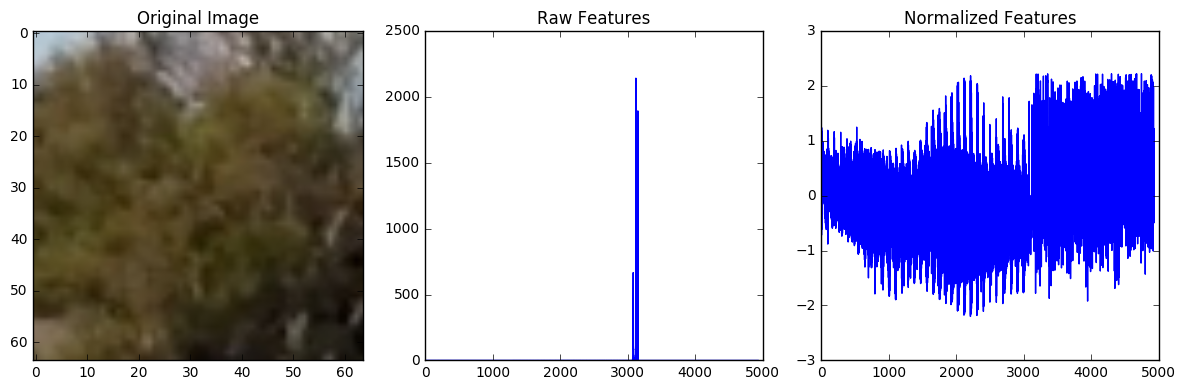

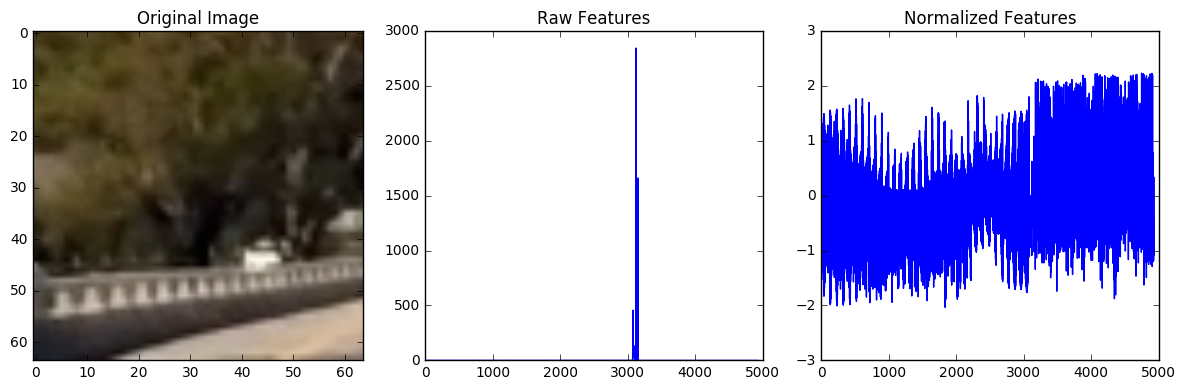

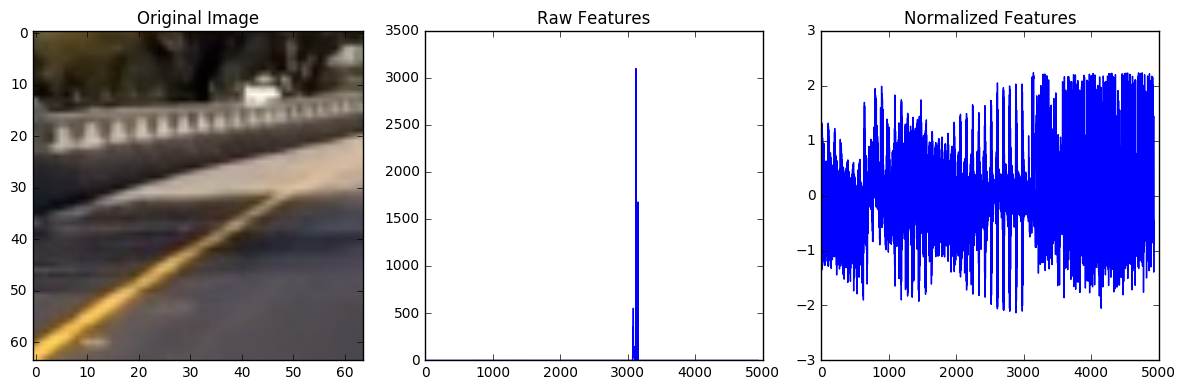

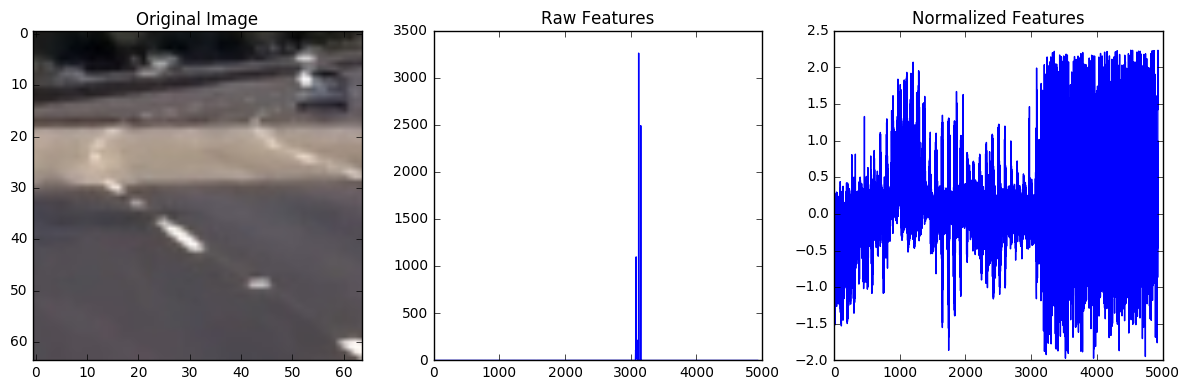

In [25]:
from util_functions import *

# Read in our vehicles and non-vehicles
images = glob.glob('./non_vehicle_test/*.png')
noncars = []

for image in images:
    noncars.append(image)
        
noncar_features = extract_features(noncars, color_space='YCrCb', spatial_size=(32, 32),
                        hist_bins=32,
                        spatial_feat=True, hist_feat=True, hog_feat=True)


for ind in range(len(noncar_features)):
    X = noncar_features                       

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)

    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(noncars[ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[ind])
    plt.title('Normalized Features')
    fig.tight_layout()


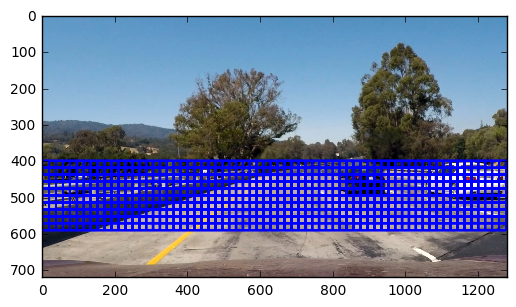

In [6]:
image = mpimg.imread('./test_images/test1.jpg')

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 600], 
                    xy_window=(96, 96), xy_overlap=(0.8, 0.8))
# for w in windows:
#     print(w)
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

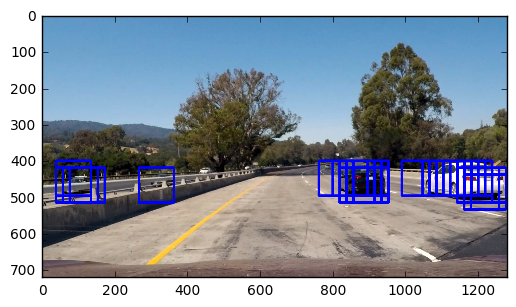

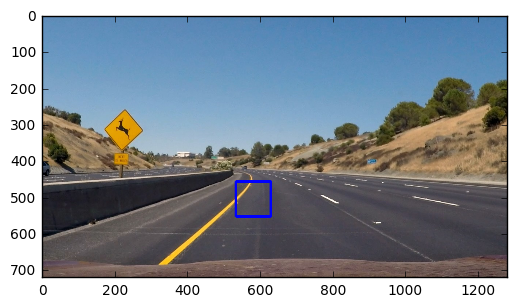

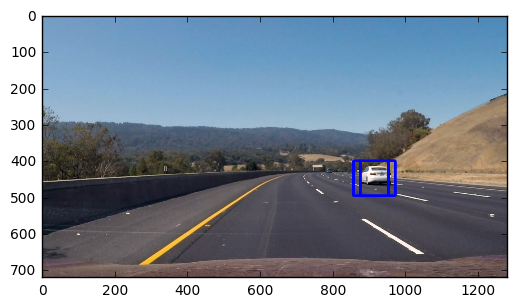

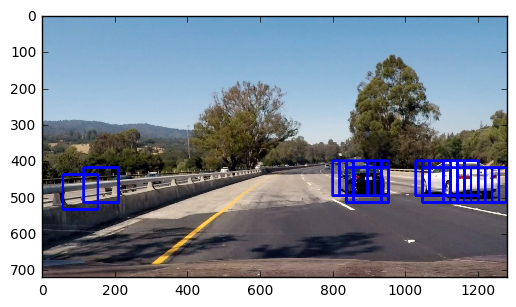

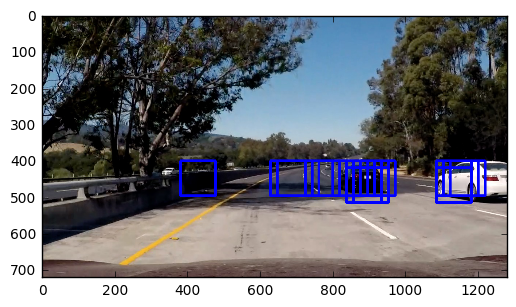

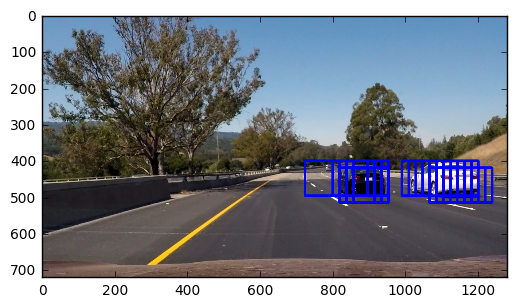

In [21]:
   
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 600] # Min and max in y to search in slide_window()


# Fit a per-column scaler
X_scaler = joblib.load('./scaler_YCrCb_HOG-ALL_featlen_10224.pkl') 

# Use a linear SVC 
svc = joblib.load('./svc_YCrCb_HOG-ALL_featlen_10224.pkl') 

images = glob.glob('./test_images/*.jpg')

for img_file in images:

    image = mpimg.imread(img_file)
    draw_image = np.copy(image)

    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32)/255

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400,600], 
                        xy_window=(96, 96), xy_overlap=(0.8, 0.8))


    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    plt.imshow(window_img)
    plt.show()

In [8]:
from vehicle_detection import VehicleDetection


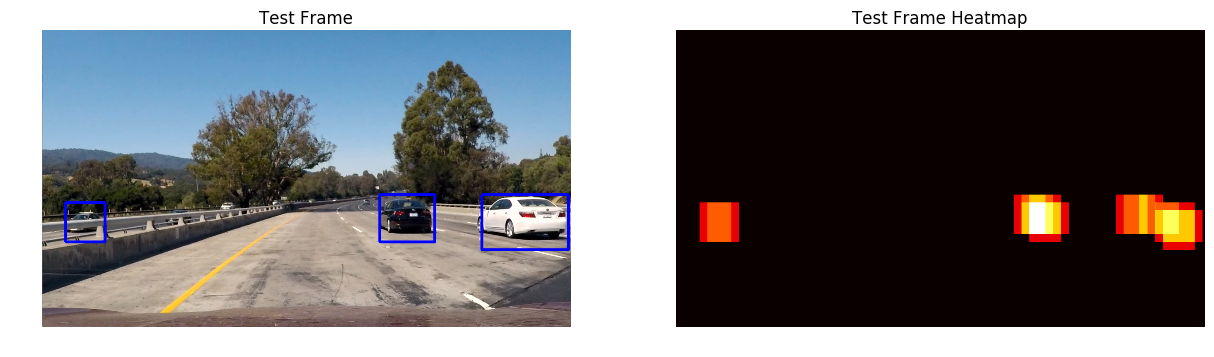

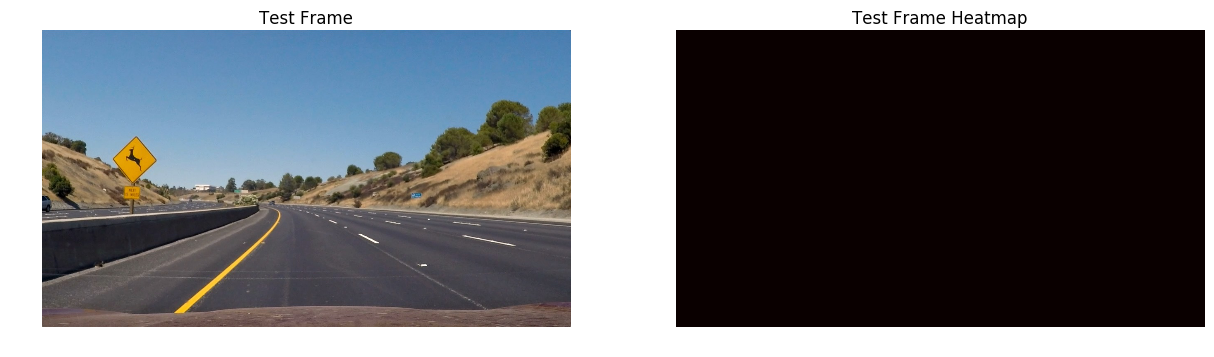

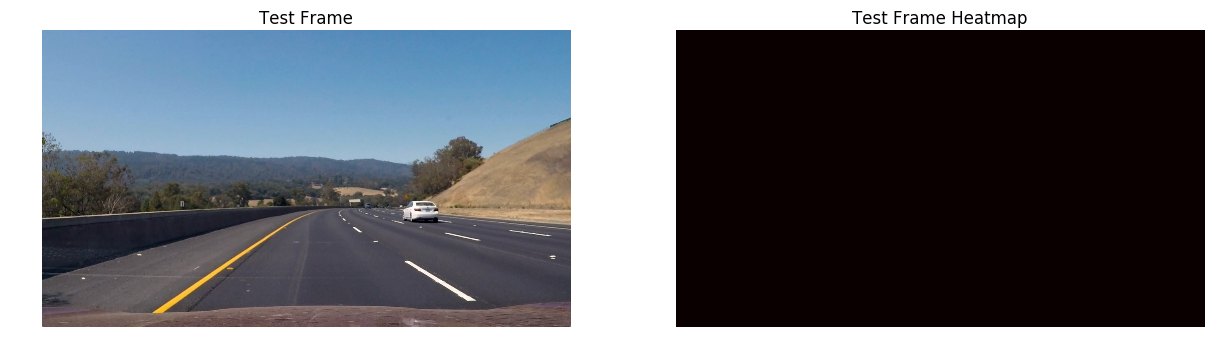

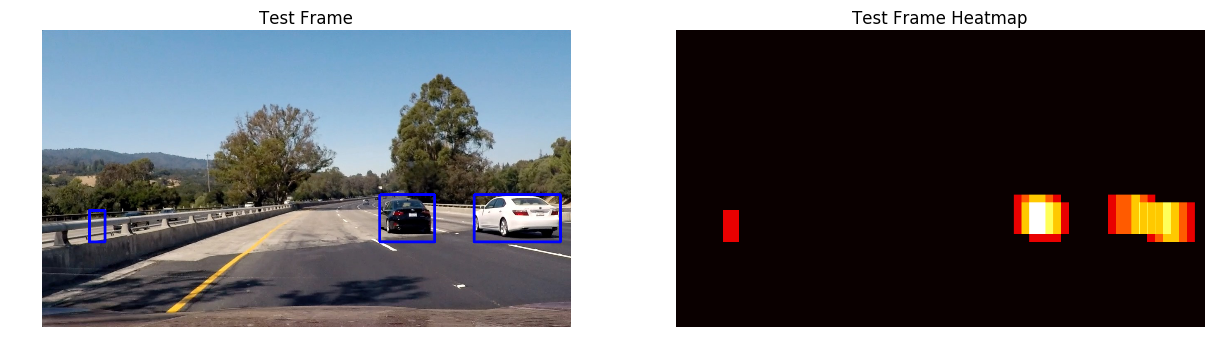

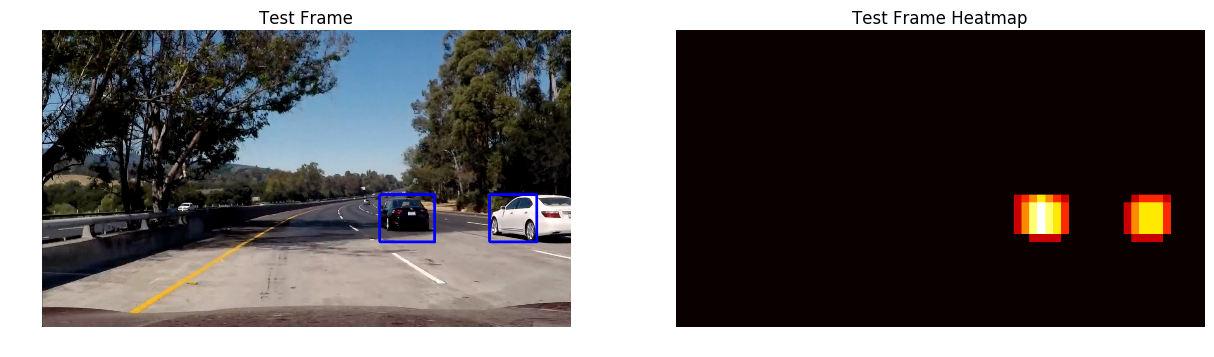

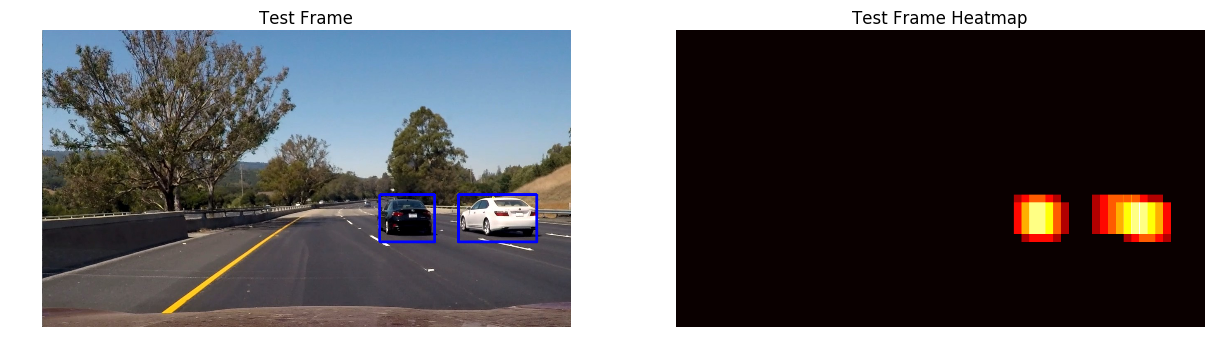

In [27]:
images = glob.glob('./test_images/*.jpg')

for img_file in images:
    image = mpimg.imread(img_file)

    vd = VehicleDetection()
#     proc_1, h_1 = vd.process_image(image.copy())
    proc_2, h_2 = vd.process_image_2(image.copy())

    fig = plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(proc_2)
    plt.title('Test Frame')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(h_2, cmap='hot')
    plt.title('Test Frame Heatmap')
    plt.axis('off')
    
    

In [10]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# vd = VehicleDetection(25,15)
# test_output = './test_video_result.mp4'
# clip = VideoFileClip('./test_video.mp4')
# test_clip = clip.fl_image(vd.process_2)

# test_clip.write_videofile(test_output, audio=False)

In [11]:
# from moviepy.editor import VideoFileClip
# from IPython.display import HTML

# vd = VehicleDetection(25,15)
# test_output = './project_video_result2.mp4'
# clip = VideoFileClip('./project_video.mp4')
# test_clip = clip.fl_image(vd.process_2)

# test_clip.write_videofile(test_output, audio=False)